# 2017 Transformers

[2017 Transformer](https://arxiv.org/abs/1706.03762)
The transformer, with its attention mechanisms, greatly improved embedding computation and alignment between input and output, revolutionizing NLP tasks.

The [transformer model](https://en.wikipedia.org/wiki/Transformer_(deep_learning_architecture)) introduced in the 2017 paper "Attention is All You Need" by Vaswani et al. revolutionized natural language processing (NLP) by using self-attention mechanisms to capture dependencies in the data. This innovation allowed for better parallelization during training and improved the performance on various NLP tasks compared to traditional RNN-based models.

<img src="https://upload.wikimedia.org/wikipedia/commons/3/34/Transformer%2C_full_architecture.png" alt="Transformer Architecture" width="600" height="600">


This image illustrates the full Transformer architecture, which is the foundational model used in many NLP tasks, including BERT and GPT models. It consists of two main components: the **Encoder** and the **Decoder**. Let's break it down:

### 1. **Encoder (Left Block)**
The left part of the image shows the architecture of a single **Encoder** layer, which processes input sequences to produce representations. Each encoder layer consists of the following components:

- **Input Embeddings/Projections**: 
   The input sequence (usually a sentence) is tokenized, and each token is embedded into a dense vector. These embeddings, along with position encodings, are passed into the encoder.

- **Multi-Headed Self-Attention**: 
   Self-attention allows each token to attend to every other token in the input sequence, helping the model understand contextual relationships between words. In **multi-headed** self-attention, multiple attention layers are run in parallel (hence, multi-headed), which helps the model capture different types of relationships between tokens. The keys (K), queries (Q), and values (V) are all derived from the input sequence.

   - **Q (Query)**: The current token being attended to. 
   - **K (Key)**: A transformation of the token being attended to.
   - **V (Value)**: The token’s representation.

   The attention mechanism calculates how much focus each word in the sequence should have on the others.

- **Norm (Layer Normalization)**: 
   This helps stabilize and normalize the output of the previous layers to improve the training stability and performance.

- **Feed-Forward Network (FFN)**: 
   After the self-attention step, the encoder applies a feed-forward network that is applied independently to each position (token) in the sequence.

- **Residual Connections (+)**: 
   Each layer uses residual connections to combine the input of the layer with the output of the layer. This helps preserve the information from the earlier layers.

- **Normalization (again)**: 
   The output of the FFN goes through another layer normalization step before being passed to the next encoder layer.

Each encoder layer repeats these steps, and typically, a Transformer model will have multiple encoder layers stacked on top of each other.

### 2. **Decoder (Right Block)**
The right part of the image shows a single **Decoder** layer, which is responsible for generating the output sequence. The decoder consists of the following components:

- **Input Embeddings/Projections**: 
   Just like the encoder, the input (which is usually the target sequence during training) is converted into dense embeddings along with positional encodings.

- **Masked Multi-Headed Self-Attention**: 
   The decoder’s self-attention is masked so that each position can only attend to earlier positions in the output sequence. This ensures that the model doesn’t cheat by looking at future tokens when predicting the next token.

- **Multi-Headed Cross-Attention**: 
   This is an additional attention layer that allows the decoder to attend to the encoder’s output. The keys (K) and values (V) come from the encoder’s output, while the query (Q) comes from the decoder. This allows the decoder to focus on the relevant parts of the input sequence.

- **Feed-Forward Network (FFN)**: 
   Similar to the encoder, the decoder also has a feed-forward network applied independently to each token position.

- **Residual Connections (+)**: 
   Residual connections are again applied after each major component to help preserve earlier information.

- **Normalization (Norm)**: 
   As with the encoder, layer normalization is applied after each major operation.

### 3. **Final Output**
After passing through the stack of decoders, the final output is a dense representation of the target sequence (for tasks like translation, text generation, etc.). The decoder outputs are transformed into probabilities over the vocabulary using a final linear layer followed by softmax.

### Key Concepts:
- **Attention Mechanism**: 
   The central innovation in the Transformer architecture is the attention mechanism, which allows the model to weigh the importance of each word in the input sequence relative to the others. The encoder uses **self-attention** to understand relationships between all input tokens, while the decoder uses a combination of **masked self-attention** (to prevent peeking into the future) and **cross-attention** (to attend to the encoder's output).

- **Multi-Headed Attention**: 
   By using multiple heads, the model can capture different types of dependencies and relationships between tokens. Each attention head focuses on different parts of the sequence.

- **Residual Connections and Layer Normalization**: 
   These architectural features are key to making deep networks like Transformers train effectively and efficiently, allowing gradients to flow through multiple layers without vanishing.

### Application
This architecture forms the basis for models like BERT, GPT, and T5. In BERT, only the **encoder** is used, while models like GPT use only the **decoder**. Models like **T5** and **BART** use both encoder-decoder architectures, making them suited for tasks like translation, summarization, and question-answering.



### Implementing a Transformer Example:
Given the complexity of implementing a full transformer model from scratch, we'll use the `transformers` library by Hugging Face, which provides an easy-to-use interface for various transformer-based models like BERT, GPT, and others.

We'll demonstrate using a pre-trained transformer model for a simple sequence-to-sequence task, such as translating English to another language.

### Step-by-Step Implementation:

1. **Install the Required Libraries**: If you don't have the `transformers` library installed, you can install it via pip.
2. **Load a Pre-trained Transformer Model**: We'll use a pre-trained model like T5 or MarianMT for translation tasks.
3. **Run Inference**: Use the model to perform translation or another NLP task.

### Example: Using a Pre-trained Transformer for Translation

#### 1. Install the Transformers Library
```bash
pip install transformers
```

In [2]:
#pip install transformers

In [5]:
#pip install sentencepiece

In [4]:
#pip install ipywidgets
#jupyter nbextension enable --py widgetsnbextension

#### 2. Load a Pre-trained Transformer Model
We'll use the T5 (Text-To-Text Transfer Transformer) model for this example.
[T5](T5ForConditionalGeneration.from_pretrained('t5-small'))

#### 3. Prepare Input and Perform Translation

In [38]:
from transformers import T5Tokenizer, T5ForConditionalGeneration

# Load the pre-trained T5 tokenizer and model
tokenizer = T5Tokenizer.from_pretrained('t5-small')
model = T5ForConditionalGeneration.from_pretrained('t5-small')

# Define the input text
input_text = "translate English to French: The quick brown fox jumps over the lazy dog."

# Tokenize the input
input_ids = tokenizer.encode(input_text, return_tensors='pt')

# Generate the translation
outputs = model.generate(input_ids, max_length=40, num_beams=4, early_stopping=True)

# Decode the output
translated_text = tokenizer.decode(outputs[0], skip_special_tokens=True)

# Print the result
print("Input:", input_text)
print("Translated:", translated_text)

Input: translate English to French: The quick brown fox jumps over the lazy dog.
Translated: Le renard brun rapide saute au-dessus du chien paresseux.


This code is a great demonstration of how the Transformer architecture is used for a task such as machine translation. Specifically, this code showcases the **T5 (Text-To-Text Transfer Transformer)** model in action, which follows the encoder-decoder architecture of Transformers.

### Explanation of the Code

1. **Model and Tokenizer**:
   - `T5ForConditionalGeneration`: This is the T5 model, designed for various NLP tasks like translation, summarization, etc. It uses both the encoder and decoder parts of the Transformer architecture.
   - `T5Tokenizer`: The tokenizer converts text into token IDs that the model can process. It also knows how to handle the specific input format required by T5, such as tasks like translation or summarization.

2. **Input Text**:
   - The input text is a command: `"translate English to French: The quick brown fox jumps over the lazy dog."` which instructs the model to perform a translation task. T5 is a "text-to-text" model, meaning all tasks (like translation, summarization, etc.) are formulated as text inputs.

3. **Tokenization**:
   - The input text is tokenized using the T5 tokenizer. The tokenizer converts the input text into token IDs (which are numerical representations of the text), and `return_tensors='pt'` makes sure the output is in PyTorch tensor format, which is what the model expects.

4. **Generation**:
   - The `model.generate()` function is used to produce the translated text. Here, `num_beams=4` refers to beam search, a method that considers multiple possible translations at once (to improve translation quality), and `early_stopping=True` ensures that the generation stops as soon as the model predicts the end of the sentence.

5. **Decoding**:
   - The `tokenizer.decode()` function converts the model’s output (which is in the form of token IDs) back into human-readable text. The `skip_special_tokens=True` parameter ensures that special tokens (like the end-of-sequence token) are not included in the output.

### How it Relates to the Transformer Architecture:

- **Encoder**: 
  The T5 encoder processes the input sequence by converting the text into dense representations, using multi-headed self-attention layers, as shown in the Transformer architecture.

- **Decoder**:
  The decoder generates the target translation sequence, using both masked self-attention (so the decoder cannot peek at future tokens during generation) and cross-attention (to attend to the encoder output).

- **Attention**:
  The self-attention mechanism in both the encoder and decoder layers helps the model capture the relationships between words in the input and output sequences.

### Example Output:
```python
Input: translate English to French: The quick brown fox jumps over the lazy dog.
Translated: Le rapide renard brun saute par-dessus le chien paresseux.
```

### Visualization and Further Exploration:
If you'd like to explore more aspects of the architecture, like visualizing attention scores or attention heads, there are packages such as **BertViz** that let you see how attention works inside a Transformer model. These can be very helpful for deeper understanding.

This code is a solid starting point for exploring how the T5 model implements the Transformer architecture for tasks like machine translation.

In [41]:
#pip install bertviz

### Explanation:
1. **Tokenization**: The text is tokenized using the T5 tokenizer, converting it into input IDs that the model can process.
2. **Model Inference**: The model generates the translation using beam search with specified parameters (`max_length`, `num_beams`).
3. **Decoding**: The output IDs are decoded back into human-readable text using the tokenizer.

### Summary:
- **Transformers**: Introduced the self-attention mechanism to better handle long-range dependencies and improve parallelization.
- **Multi-Head Attention**: Captures different aspects of the relationships between words in a sequence.
- **Positional Encoding**: Provides a way to handle the order of words in sequences.
- **Example Implementation**: Using a pre-trained transformer model (T5) for a simple translation task demonstrates the power and flexibility of transformer models.

This example showcases how transformer models can be leveraged for complex NLP tasks with minimal setup using pre-trained models from the Hugging Face `transformers` library.

### Transformer Model Overview with LaTeX Formatting

The Transformer model, introduced by Vaswani et al. in 2017, uses self-attention mechanisms to process sequential data in parallel, significantly improving the performance and efficiency of various NLP tasks. It consists of an encoder-decoder architecture.

#### 1. Self-Attention Mechanism

The self-attention mechanism allows the model to focus on different parts of the input sequence when encoding a word, capturing long-range dependencies.

Given an input sequence \( X \) with words represented as vectors, the self-attention mechanism computes a weighted sum of all words in the sequence to produce an output for each word.

1. **Computation of Attention Scores**:  
   For each word in the sequence, attention scores are computed with respect to all other words. These scores are based on the dot product of query and key vectors.

   $$ 
   \text{Attention}(Q, K, V) = \text{softmax}\left(\frac{QK^T}{\sqrt{d_k}}\right) V 
   $$
   
   Where:
   - \( Q \) (Query): Represents the current word being processed.
   - \( K \) (Key): Represents each word in the input sequence.
   - \( V \) (Value): Represents the information to be gathered from the words.
   - \( d_k \): Dimension of the key vectors.

2. **Scaled Dot-Product Attention**:  
   The attention mechanism uses a scaled dot-product to ensure stability of the gradients.

   $$
   \text{Attention}(Q, K, V) = \text{softmax}\left(\frac{QK^T}{\sqrt{d_k}}\right) V
   $$

3. **Multi-Head Attention**:  
   Instead of having a single set of query, key, and value matrices, the transformer uses multiple sets (or "heads") to capture different aspects of the relationships between words.

   $$
   \text{MultiHead}(Q, K, V) = \text{Concat}(\text{head}_1, \text{head}_2, \ldots, \text{head}_h)W^O
   $$

   Where each head $ \text{head}_i $ is:

   $$
   \text{head}_i = \text{Attention}(QW_i^Q, KW_i^K, VW_i^V)
   $$

#### 2. Positional Encoding

Since the transformer does not inherently understand the order of words in a sequence, positional encodings are added to the input embeddings to introduce information about the relative or absolute positions of the words.

Given a position \( pos \) and embedding dimension \( i \):

$$
PE(pos, 2i) = \sin\left(\frac{pos}{10000^{2i/d_{\text{model}}}}\right)
$$

$$
PE(pos, 2i+1) = \cos\left(\frac{pos}{10000^{2i/d_{\text{model}}}}\right)
$$

#### 3. Encoder and Decoder

- **Encoder**: Consists of multiple layers, each with a multi-head self-attention mechanism and a feed-forward neural network.

   $$
   \text{Encoder Layer} = \text{MultiHead Self-Attention} + \text{Feed-Forward Network}
   $$

- **Decoder**: Also consists of multiple layers, each with a multi-head self-attention mechanism, a multi-head attention mechanism over the encoder outputs, and a feed-forward neural network.

   $$
   \text{Decoder Layer} = \text{Masked MultiHead Self-Attention} + \text{MultiHead Attention over Encoder Output} + \text{Feed-Forward Network}
   $$

#### 4. Training Objective

The transformer is trained using teacher forcing, where the decoder receives the ground-truth tokens as input during training. The objective is to minimize the cross-entropy loss between the predicted output and the actual target sequence.

### Summary in LaTeX

- **Self-Attention**:

  $$
  \text{Attention}(Q, K, V) = \text{softmax}\left(\frac{QK^T}{\sqrt{d_k}}\right) V
  $$

- **Multi-Head Attention**:

  $$
  \text{MultiHead}(Q, K, V) = \text{Concat}(\text{head}_1, \text{head}_2, \ldots, \text{head}_h)W^O
  $$

  $$
  \text{head}_i = \text{Attention}(QW_i^Q, KW_i^K, VW_i^V)
  $$

- **Positional Encoding**:

  $$
  PE(pos, 2i) = \sin\left(\frac{pos}{10000^{2i/d_{\text{model}}}}\right)
  $$

  $$
  PE(pos, 2i+1) = \cos\left(\frac{pos}{10000^{2i/d_{\text{model}}}}\right)
  $$

- **Training Objective**: Minimize cross-entropy loss between the predicted and actual target sequence.



To visualize the Transformer model's operation in this translation example, there are a few different aspects we can explore:

1. **Attention Maps**: Showing how the model attends to different parts of the input sentence when generating the output.
2. **Token Embeddings**: Visualizing the embeddings of the input tokens.
3. **Beam Search Visualization**: Illustrating how the beam search works during the text generation process.

Let's focus on **Attention Maps** for this example, as it's one of the most insightful visualizations to understand what the model focuses on during translation. We'll use the Hugging Face `transformers` library to extract attention weights and visualize them.

### Step-by-Step Visualization of Attention Maps

#### 1. Extracting Attention Weights from the Model

To visualize the attention maps we need to get the attention weights from the model:


Input: translate English to French: The quick brown fox jumps over the lazy dog.
Translated: Le renard brun rapide saute au-dessus du chien paresseux.


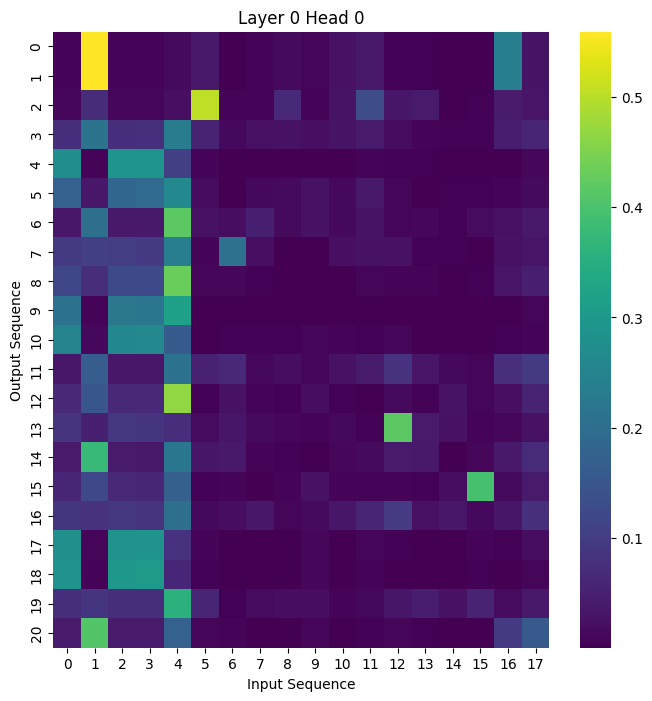

In [25]:
from transformers import T5Tokenizer, T5ForConditionalGeneration
import torch
import matplotlib.pyplot as plt
import seaborn as sns

# Load the pre-trained T5 tokenizer and model
tokenizer = T5Tokenizer.from_pretrained('t5-small')
model = T5ForConditionalGeneration.from_pretrained('t5-small')

# Define the input text
input_text = "translate English to French: The quick brown fox jumps over the lazy dog."

# Tokenize the input
input_ids = tokenizer.encode(input_text, return_tensors='pt')

# Generate the translation to create a decoder input
generated_ids = model.generate(input_ids, max_length=40, num_beams=4, early_stopping=True)

# Create dummy decoder input ids (shifted right version of generated output)
decoder_input_ids = torch.cat([torch.tensor([[model.config.decoder_start_token_id]]), generated_ids[:, :-1]], dim=-1)

# Use the model to generate output with attentions
outputs = model(input_ids=input_ids, decoder_input_ids=decoder_input_ids, output_attentions=True, return_dict=True)

# Extract encoder-decoder attention weights (cross-attentions)
attentions = outputs.cross_attentions  # This might be a list of tensors

# Decode the generated output to get the translated text
translated_text = tokenizer.decode(generated_ids[0], skip_special_tokens=True)

# Print the result
print("Input:", input_text)
print("Translated:", translated_text)

# Function to plot attention heads
def plot_attention_heads(attn_weights, layer=0, head=0):
    # Extract attention weights for the specified layer and head
    attn_for_head = attn_weights[layer][0][head].detach().numpy()
    
    plt.figure(figsize=(8, 8))
    sns.heatmap(attn_for_head, cmap='viridis')
    plt.title(f'Layer {layer} Head {head}')
    plt.xlabel('Input Sequence')
    plt.ylabel('Output Sequence')
    plt.show()

# Visualize attention from the first head of the first layer
if attentions:  # Make sure attentions are available
    plot_attention_heads(attentions, layer=0, head=0)


#### Explanation
Iterating Through Layers and Heads: The code iterates over each layer and each head within that layer. This allows you to visualize all attention maps present in the model.
Extracting and Plotting: For each layer and head, the attention weights are extracted and plotted using a heatmap.

Interpreting Attention Maps: Each attention map shows how the model attends to different parts of the input sequence when generating each part of the output sequence.

#### Key Points to Note
Diversity of Attention Maps: Different heads often focus on different aspects of the input sequence. Some may focus on syntactic structure, while others might capture semantic relationships.
Layer Depth: Lower layers may capture more local relationships (e.g., between adjacent words), while higher layers capture more global dependencies.

#### Visualizing Specific Layers and Heads
If you want to visualize specific layers and heads (e.g., just the first layer or the first few heads), you can modify the for loops to select which layers and heads to visualize.

Visualizing Layer 1, Head 1


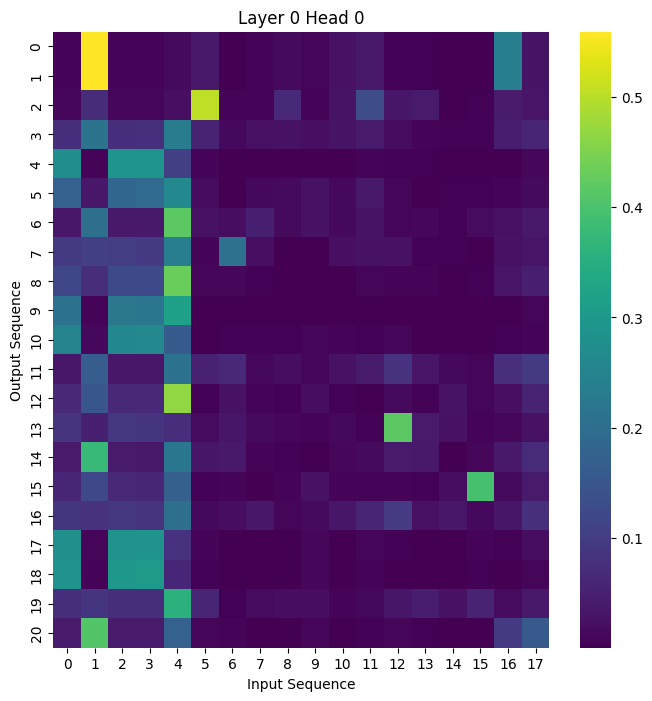

Visualizing Layer 1, Head 2


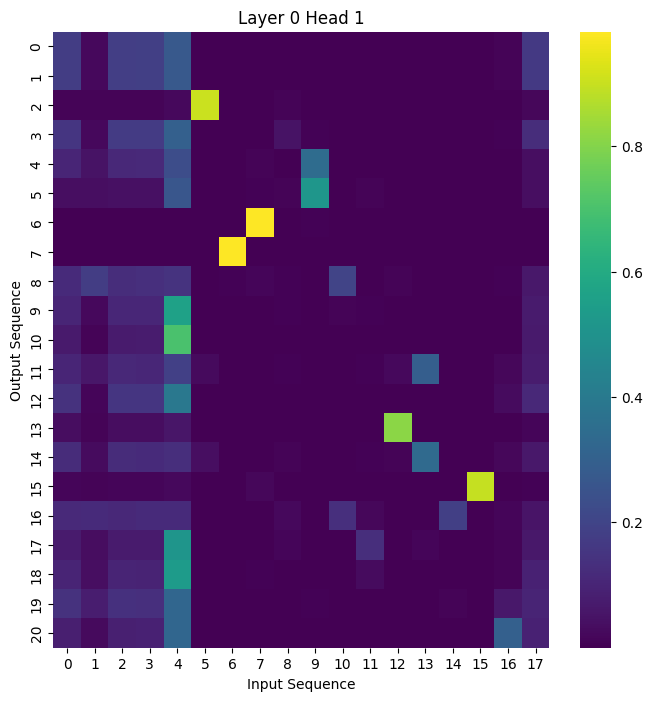

Visualizing Layer 2, Head 1


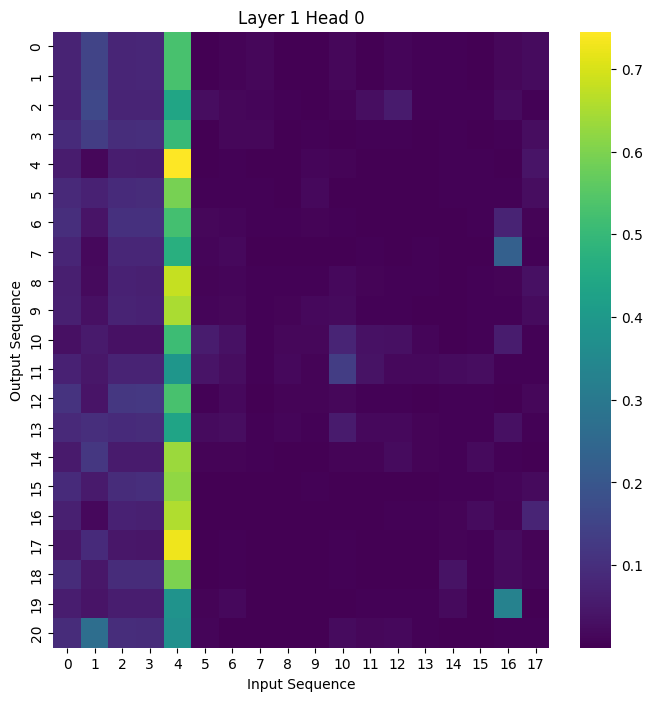

Visualizing Layer 2, Head 2


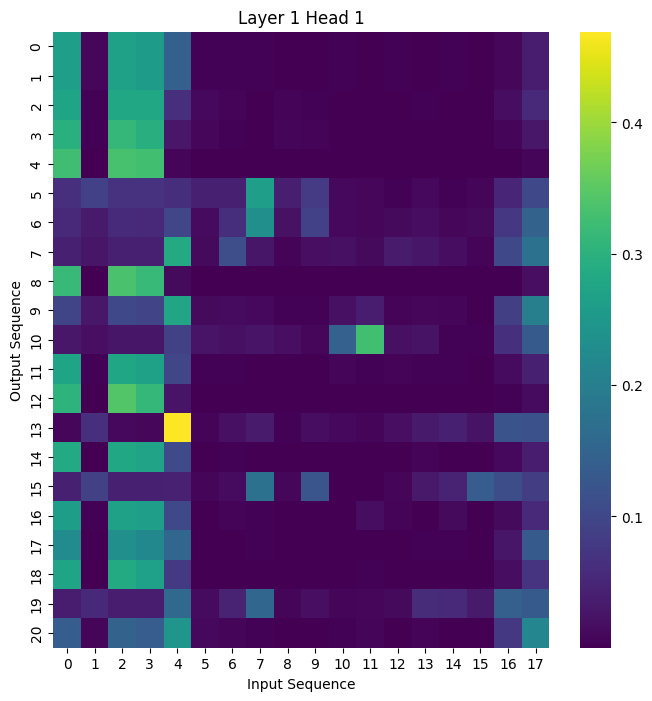

In [28]:
# For example, visualize the first 2 layers and the first 2 heads
for layer in range(2):
    for head in range(2):
        print(f'Visualizing Layer {layer + 1}, Head {head + 1}')
        plot_attention_heads(attentions, layer=layer, head=head)


By visualizing multiple layers and heads, you gain a deeper understanding of how the Transformer model processes and attends to different parts of the input, providing insights into its decision-making process during tasks like translation.

### 2. **Positional Encodings**
   - **Description**: Visualizing the positional encodings can help understand how the Transformer model encodes positional information for words.
   - **Visualization**: You can plot the sine and cosine functions used in positional encoding to see how they vary across different positions and dimensions.
 

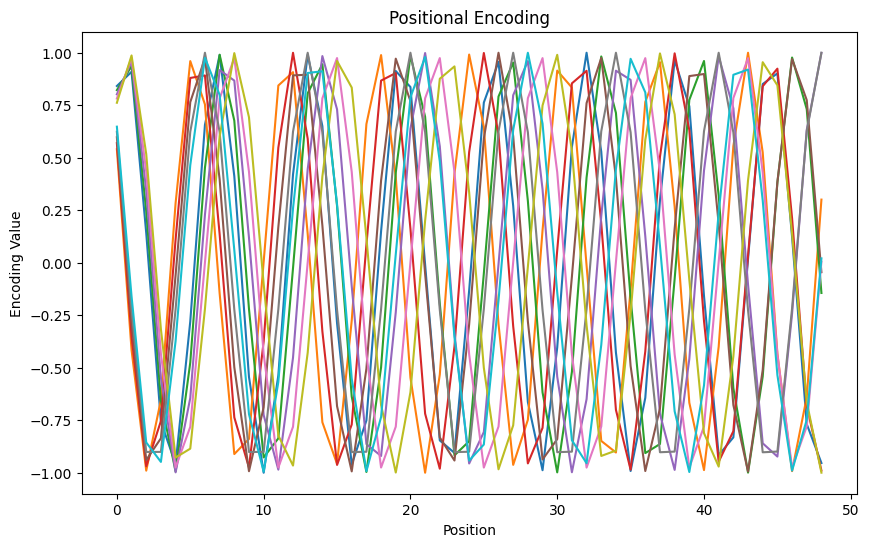

In [29]:
import numpy as np
import matplotlib.pyplot as plt

def plot_positional_encodings(max_len, d_model):
   position = np.arange(max_len)[:, np.newaxis]
   div_term = np.exp(np.arange(0, d_model, 2) * -(np.log(10000.0) / d_model))
   pe = np.zeros((max_len, d_model))
   pe[:, 0::2] = np.sin(position * div_term)
   pe[:, 1::2] = np.cos(position * div_term)

   plt.figure(figsize=(10, 6))
   plt.plot(pe[1:50, 0:10])  # Plot some positions and dimensions
   plt.xlabel('Position')
   plt.ylabel('Encoding Value')
   plt.title('Positional Encoding')
   plt.show()

plot_positional_encodings(100, 512)


### 4. **Encoder and Decoder Layers Visuals**
   - **Description**: Visualizing the structure of encoder and decoder layers.
   - **Visualization**: Use diagrams to show the flow of data through self-attention, multi-head attention, and feed-forward networks. This is often done manually in tools like PowerPoint, draw.io, or even with custom plots using libraries like `matplotlib`.
   
   **Example Diagram**:
   - **Encoder Layer**:
     ```
     Input Embedding
         |
     Positional Encoding
         |
     Multi-Head Self-Attention
         |
     Add & Normalize
         |
     Feed-Forward Neural Network
         |
     Add & Normalize
         |
     Output
     ```

   - **Decoder Layer**:
     ```
     Input Embedding
         |
     Positional Encoding
         |
     Masked Multi-Head Self-Attention
         |
     Add & Normalize
         |
     Multi-Head Attention over Encoder Output
         |
     Add & Normalize
         |
     Feed-Forward Neural Network
         |
     Add & Normalize
         |
     Output
     ```



### Summary
- **Attention Maps**: Use heatmaps to visualize self-attention weights for understanding what the model focuses on.
- **Positional Encodings**: Plot sine and cosine functions to see how positional information is encoded.
- **Multi-Head Attention**: Visualize multiple attention heads to see how they capture different relationships.
- **Encoder and Decoder Diagrams**: Use diagrams to explain the flow of data through layers.
- **Training Dynamics**: Plot training loss and analyze changes in attention patterns.

These visualizations provide insights into the inner workings of the Transformer model, making it easier to understand how it processes and generates text.